##**ABOUT DATASET:-**
#Twitter Sentiment Dataset
Twitter Sentiment Analysis

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import spacy
from time import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
import seaborn as sns
sns.set_style("darkgrid")

import itertools
from wordcloud import WordCloud
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec, KeyedVectors
from tensorflow.keras.layers import Embedding

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataframe = pd.read_csv('/content/Twitter_Data.csv')
dataframe.head(2)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0


from matplotlib import pyplot as plt
_df_0['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['clean_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='category', y='clean_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
dataframe.isnull()

,clean_text,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
162975,False,False
162976,False,False
162977,False,False
162978,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_7.groupby('clean_text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('clean_text')
_ = plt.ylabel('category')

In [ ]:
dataframe.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
dataframe = dataframe.dropna().reset_index(drop=True)
dataframe.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
dataframe['clean_text']= dataframe['clean_text'].str.lower()

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataframe['clean_text'] = dataframe['clean_text'].apply(lambda x: cleaning_URLs(x))

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataframe['clean_text'] = dataframe['clean_text'].apply(lambda x: cleaning_numbers(x))

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

dataframe['clean_text'] = np.vectorize(remove_pattern)(dataframe['clean_text'], "@[\w]*")

In [ ]:
dataframe['clean_text'] = dataframe['clean_text'].str.replace("[^a-zA-Z#]", " ")
dataframe.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


from matplotlib import pyplot as plt
_df_8['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['clean_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='category', y='clean_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in dataframe['clean_text'])

In [ ]:
t = time()
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))
dataframe.head(5)

Time to clean up everything: 9.78 mins


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
print(df_clean.shape)
df_clean.head(5)

(154006, 1)


,clean
0,modi promise minimum government maximum govern...
1,talk nonsense continue drama vote modi
2,vote modi welcome bjp tell rahul main campaign...
3,ask supporter prefix chowkidar name modi great...
4,answer powerful world leader today trump putin...


91352


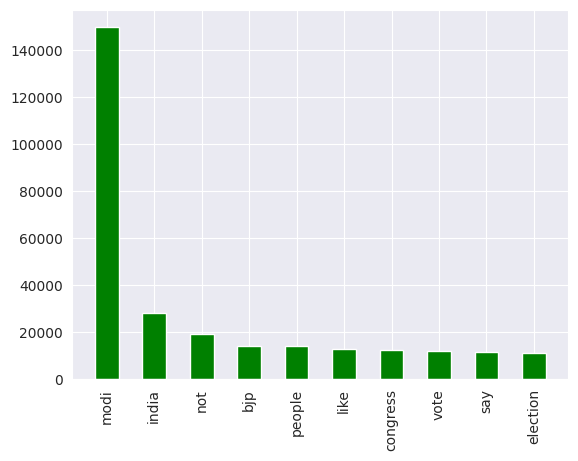

In [ ]:
all_words = " ".join([sentence for sentence in df_clean['clean']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))
hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))
plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

NLTK stop word lists 

{'is', 'shouldn', 'how', 'ain', "aren't", "haven't", 'while', 'under', "shouldn't", 's', 'no', 'here', 'had', 'with', 'more', 'me', 'out', 'on', 'once', 'theirs', 'whom', 'by', 'any', 'but', 'own', 'up', "weren't", "you're", 'what', 'has', 'the', 'that', 'needn', 'an', 'are', "needn't", 'through', 'if', 'after', 'in', 'ma', 'aren', 'wasn', "didn't", 'd', 'my', 'there', 'themselves', 'your', 'does', 'their', 'our', 'about', 'just', 'did', 'a', 'shan', 'yourselves', 'again', 'so', 'have', "hadn't", 'they', 'y', 'm', 'these', 'it', 'was', 'isn', 'o', "wouldn't", 'over', 'weren', 'hadn', "shan't", 'not', 'them', 'most', 'other', "won't", 'than', 'at', 'mightn', 'i', 'now', 'yourself', 'until', "you'd", 'only', 'he', 'before', 'were', "don't", 'its', 'doing', 'against', 'been', 'we', 'off', 'or', 'to', 'because', 'don', 'above', "she's", 'each', 'can', "you've", 'didn', 'too', 'nor', 'having', 'herself', "should've", 'hers', 'be', 'him', "mightn't", 'ourselves', 'hasn

In [ ]:
#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [ ]:
df_clean['clean'] = df_clean['clean'].apply(remove_stopwords)
df_clean.head()

,clean
0,modi promise minimum government maximum govern...
1,talk nonsense continue drama vote modi
2,vote modi welcome bjp tell rahul main campaign...
3,ask supporter prefix chowkidar name modi great...
4,answer powerful world leader today trump putin...


In [ ]:
# How many unique words in the vocabulary?

all_words = " ".join([sentence for sentence in df_clean['clean']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))

91284


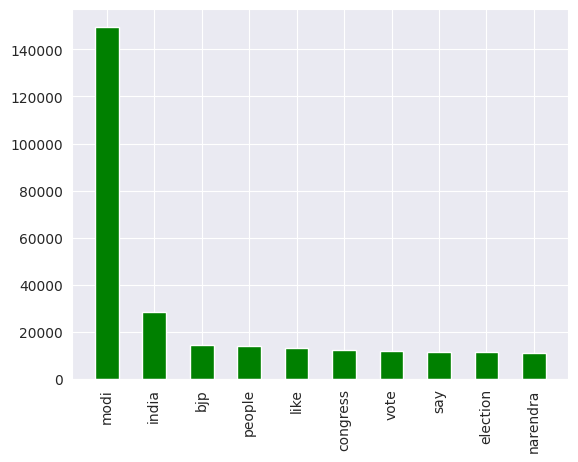

In [ ]:
hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))
plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [ ]:
all_sentances = ' '
j = 0
for i in sentences:
    check = ' '.join(i)
    all_sentances = ' '.join([all_sentances, check])

In [ ]:
cores = multiprocessing.cpu_count()
print(cores)

2


In [ ]:
model = Word2Vec(
    sentences = sentences,
    compute_loss=True
)
model.get_latest_training_loss()

8515466.0

In [ ]:
model.build_vocab(sentences, progress_per=10000)
model.corpus_count

154006

In [ ]:
class MetricCallback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self, every=10):
        self.myloss = []
        self.epoch = 0
        self.every = every
def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.myloss.append(loss)
        else:
            self.myloss.append(loss - self.loss_previous_step)
        if self.epoch % self.every == 0:
            print(f'Loss after epoch {self.epoch}: {self.myloss[-1]}')
        self.epoch += 1
        self.loss_previous_step = loss

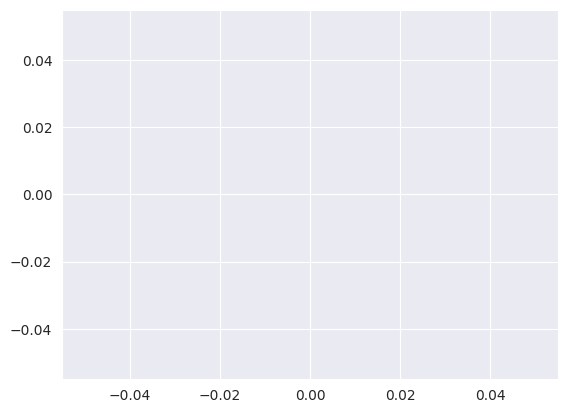

In [ ]:
metric = MetricCallback(every=1)
model = Word2Vec(
    sentences = sentences,
    vector_size=300,
    max_vocab_size = model.corpus_count,
    compute_loss=True,
    callbacks=[metric],
    alpha=0.03,
    min_alpha=0.0007,
    workers=cores-1
)
plt.plot(metric.myloss)

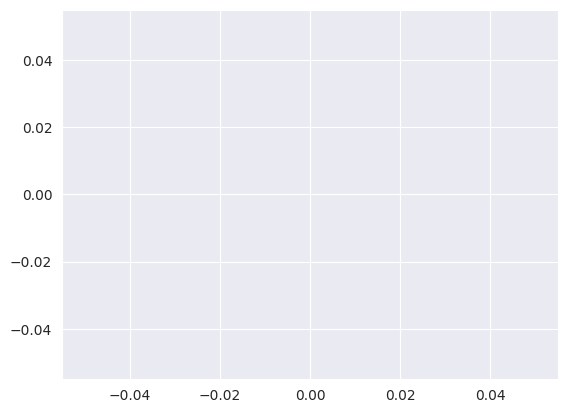

In [ ]:
metric = MetricCallback(every=1)
model = Word2Vec(
    sentences = sentences,
    vector_size=300,
    max_vocab_size = model.corpus_count,
    compute_loss=True,
    callbacks=[metric],
    alpha=0.03,
    min_alpha=0.0007,
    workers=cores-1,
    epochs = 10,
)
plt.plot(metric.myloss)

In [ ]:
model.wv.most_similar(positive=['india'])

[('country', 0.6084174513816833),
 ('prosperous', 0.48554450273513794),
 ('indias', 0.4544640779495239),
 ('attain', 0.4291522204875946),
 ('nation', 0.42490705847740173),
 ('shape', 0.4206399917602539),
 ('super_power', 0.4200420081615448),
 ('modern', 0.41222962737083435),
 ('prosper', 0.4042808413505554),
 ('instability', 0.40344080328941345)]

In [ ]:
model.wv.most_similar(negative=['india'])

[('patra', 0.4229608476161957),
 ('verma', 0.39038270711898804),
 ('kumar', 0.38581281900405884),
 ('box', 0.37923547625541687),
 ('kunal', 0.3696291446685791),
 ('tick', 0.3514675199985504),
 ('alok', 0.3484192192554474),
 ('jal', 0.3437405526638031),
 ('rap', 0.342313289642334),
 ('prasoon', 0.3387960195541382)]

In [ ]:
model.wv.most_similar(positive=['bjp'])

[('bjps', 0.5590563416481018),
 ('shiv_sena', 0.5197820663452148),
 ('jds', 0.5157992243766785),
 ('trs', 0.5103661417961121),
 ('karnataka', 0.5084768533706665),
 ('ncp', 0.5032449960708618),
 ('cadre', 0.49868664145469666),
 ('dmk', 0.4960772693157196),
 ('ally', 0.48897820711135864),
 ('regional_party', 0.48437896370887756)]

In [ ]:
model.wv.most_similar(negative=['bjp'])

[('classic', 0.37836694717407227),
 ('blockchain', 0.3522600829601288),
 ('candy', 0.3450116813182831),
 ('dish', 0.3332708179950714),
 ('launcher', 0.3328856825828552),
 ('kumkum', 0.3163149356842041),
 ('dhoom', 0.31629204750061035),
 ('mild', 0.30891627073287964),
 ('surgery', 0.30771902203559875),
 ('crash', 0.3014219105243683)]

In [ ]:
model.wv.most_similar(positive=['narendramodi'])

[('videoconference', 0.763302206993103),
 ('pmoindia', 0.754280686378479),
 ('koraput', 0.7368707060813904),
 ('financialxpress', 0.7324163317680359),
 ('watch_live', 0.7312096953392029),
 ('aalo', 0.7261995077133179),
 ('late_update', 0.720095157623291),
 ('wednesday', 0.6926934719085693),
 ('jeypore', 0.6871997714042664),
 ('live_update', 0.6826858520507812)]

In [ ]:
model.wv.most_similar(negative=['election'])

[('doctor', 0.29316774010658264),
 ('charter', 0.29292556643486023),
 ('arab', 0.292487233877182),
 ('kalam', 0.2835865020751953),
 ('girl', 0.28284329175949097),
 ('nitin', 0.27887046337127686),
 ('candy', 0.2782319188117981),
 ('gau', 0.27455320954322815),
 ('feminist', 0.26687341928482056),
 ('thick', 0.2616860866546631)]

In [ ]:
model.wv.most_similar(positive=['election'])

[('poll', 0.6564267873764038),
 ('general_election', 0.5685779452323914),
 ('polls', 0.5125745534896851),
 ('bypoll', 0.4611496925354004),
 ('unlikely', 0.4526599645614624),
 ('electoral', 0.44132503867149353),
 ('elections', 0.43447449803352356),
 ('assembly_election', 0.4292643368244171),
 ('election_campaign', 0.41397878527641296),
 ('loksabha_election', 0.4041306674480438)]